In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [141]:
csv = pd.read_csv('C:/My Documents/Data Science/RU_youtube_trending_data.csv')
df1 = csv.copy(deep=True)

In [142]:
df = df1.loc[:,['title','publishedAt','channelTitle','categoryId','trending_date','tags','view_count','likes','dislikes','comment_count','comments_disabled','ratings_disabled']]

In [143]:
with open("C:/My Documents/Data Science/RU_category_id.json", "r") as f:
    cates = json.load(f)
f.close()

id2cate = {}
for cate in cates["items"]:
    ids = int(cate["id"])
    snippet = cate["snippet"]
    if ids not in id2cate:
        id2cate[ids] = snippet["title"]

In [144]:
df['category'] = df['categoryId'].apply(lambda x: id2cate[x] if x in id2cate else 'Unknown')
df = df.drop('categoryId',axis=1);

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85442 entries, 0 to 85441
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              85442 non-null  object
 1   publishedAt        85442 non-null  object
 2   channelTitle       85442 non-null  object
 3   trending_date      85442 non-null  object
 4   tags               85442 non-null  object
 5   view_count         85442 non-null  int64 
 6   likes              85442 non-null  int64 
 7   dislikes           85442 non-null  int64 
 8   comment_count      85442 non-null  int64 
 9   comments_disabled  85442 non-null  bool  
 10  ratings_disabled   85442 non-null  bool  
 11  category           85442 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 6.7+ MB


In [235]:
df.describe(include='all')

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,likes/dislikes
count,85442,85442,85442,85442,85442,8.544200e+04,8.544200e+04,85442.000000,8.544200e+04,85442,85442,85442,84641.000000
unique,50716,50110,5136,413,36601,NaN,NaN,NaN,NaN,2,2,15,NaN
top,ХИТЫ 2021 ♫ ТОП МУЗЫКА ИЮЛЬ 2021 🎵 НОВИНКИ МУЗ...,2021-06-05T07:00:02Z,Телеканал Дождь,2021-03-02T00:00:00Z,[None],NaN,NaN,NaN,NaN,False,False,People & Blogs,NaN
freq,51,13,861,400,7467,NaN,NaN,NaN,NaN,83944,84641,14778,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.008394e+05,5.188683e+04,1505.790103,5.675867e+03,NaN,NaN,NaN,49.106269
std,NaN,NaN,NaN,NaN,NaN,2.886725e+06,2.499575e+05,7642.328812,6.413201e+04,NaN,NaN,NaN,68.962489
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,0.007412
25%,NaN,NaN,NaN,NaN,NaN,8.649150e+04,3.820000e+03,133.000000,3.420000e+02,NaN,NaN,NaN,14.939655
50%,NaN,NaN,NaN,NaN,NaN,1.995600e+05,1.014550e+04,339.000000,9.630000e+02,NaN,NaN,NaN,32.392157
75%,NaN,NaN,NaN,NaN,NaN,5.034208e+05,2.958375e+04,966.000000,2.520750e+03,NaN,NaN,NaN,60.493878


In [146]:
df.head(5)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,A4,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,False,False,Entertainment
1,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,DAVA,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,False,False,People & Blogs
2,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,X2DED,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,False,False,Film & Animation
3,ВЫРВАЛАСЬ и УЛЕТЕЛА!!! / ТУРИЗМ 2020,2020-08-12T09:00:50Z,TheKateClapp,2020-08-12T00:00:00Z,катя|клэп|катюша|kate|clapp|детское|школа|смеш...,355978,64073,585,2771,False,False,People & Blogs
4,Полный контакт / Соловьёв LIVE / 12 августа 20...,2020-08-12T08:43:30Z,Соловьёв LIVE,2020-08-12T00:00:00Z,Соловьев|Владимир Соловьев|Соловьев live|solov...,428221,19329,5126,1034,False,False,News & Politics


In [147]:
dl = df.nlargest(10,'dislikes')[['title','channelTitle','dislikes','likes']]
dl['likes/dislikes'] = dl['likes']/dl['dislikes']
dl

,title,channelTitle,dislikes,likes,likes/dislikes
3948,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,778804,10751100,13.804629
3635,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,733815,10370577,14.132413
2167,Cuties | Official Trailer | Netflix,Netflix,686745,21314,0.031036
3408,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,592601,7562716,12.761902
2487,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,576865,14678180,25.444740
2229,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,505313,14134688,27.972144
1864,Cuties | Official Trailer | Netflix,Netflix,471525,16014,0.033962
3201,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,BLACKPINK,405443,5913574,14.585463
2002,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,364110,9888117,27.156950
722,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,DAVA,189171,123746,0.654149


<AxesSubplot:xlabel='view_count', ylabel='likes/dislikes'>

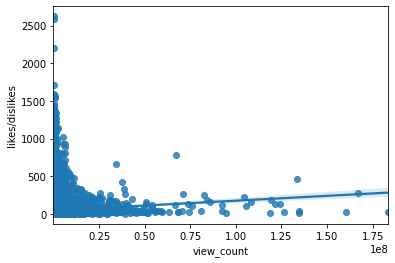

In [148]:
df['likes/dislikes'] = df['likes']/df['dislikes']
sns.regplot(x='view_count',y='likes/dislikes',data=df)

In [149]:
df.nlargest(10,'comment_count')[['title','channelTitle','comment_count']]

,title,channelTitle,comment_count
55880,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,5987787
2487,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,5748681
55655,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,5594499
2229,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,5452130
2002,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,4907638
20313,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,3913352
20002,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,3412868
55471,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,3403157
66723,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,2691233
67010,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,2651260


<AxesSubplot:xlabel='likes', ylabel='dislikes'>

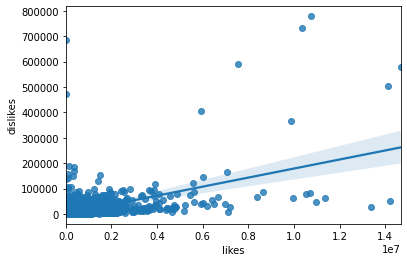

In [150]:
sns.regplot(x='likes',y='dislikes',data=df)

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

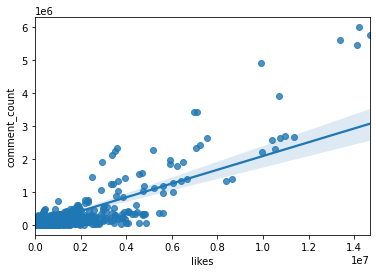

In [151]:
sns.regplot(x='likes',y='comment_count',data=df)

In [152]:
dfcorr = df[['likes','dislikes','comment_count','view_count']]
dfcorr = dfcorr.corr()

<AxesSubplot:>

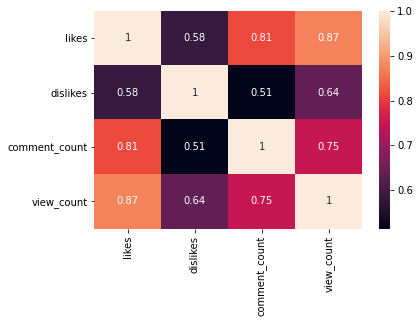

In [153]:
sns.heatmap(dfcorr, annot=True)

In [154]:
countcat = df['category'].value_counts()
countcat

People & Blogs          14778
Entertainment           14130
News & Politics         11156
Music                    7440
Sports                   7036
Film & Animation         6483
Comedy                   5944
Autos & Vehicles         5370
Gaming                   3815
Howto & Style            2673
Science & Technology     2601
Unknown                  2001
Education                 818
Travel & Events           671
Pets & Animals            526
Name: category, dtype: int64

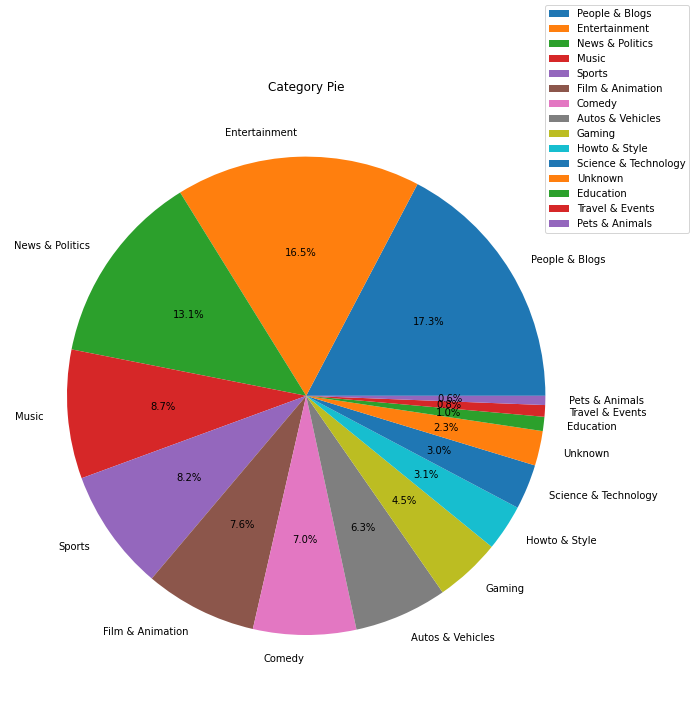

In [155]:
fig, axe = plt.subplots(figsize=(11,11))
axe.set_title('Category Pie')
axe = plt.pie(countcat,labels=countcat.index,autopct='%1.1f%%')
fig.legend(countcat.index)
plt.show()

### Выделение тегов

In [156]:
dt = df.loc[:,['tags']]
dt2 = dt['tags'].apply(lambda x: x.split('|'))
dt2

0        [Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть*...
1        [РОЛЕКС, DAVA, Киркоров, 2020, музыка в машину...
2        [как я чуть не умер, чуть не умер, история из ...
3        [катя, клэп, катюша, kate, clapp, детское, шко...
4        [Соловьев, Владимир Соловьев, Соловьев live, s...
                               ...                        
85437    [Бэкст, Бекст, Bekst, Кладовая Бэкста, Прохожд...
85438    [OTVET!!! Nasim Xolov yirtaman oldimdan chiqma...
85439                                             [[None]]
85440    [hoi4, hearts of iron 4, хои4, япония, упор, ф...
85441                                             [[None]]
Name: tags, Length: 85442, dtype: object

In [178]:
dt3 = pd.DataFrame(dt2.loc[0])
for i in range(1,5):
    dt22 = pd.DataFrame(dt2.loc[i])
    dt3 = dt3.merge(dt22,how='outer')
dt3

,0
0,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**
1,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж 2 часть
2,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж
3,Побег Из КАРТОННОЙ ТЮРЬМЫ
4,Побег Из ТЮРЬМЫ
...,...
150,итоги выборов беларусь
151,беларусь выборы 2020
152,беларусь выборы итоги
153,итоги выборов белоруссия


In [227]:
'''''
dt3 = pd.DataFrame(dt2.loc[0])
for i in range(1,dt2.size):
    dt22 = pd.DataFrame(dt2.loc[i])
    dt3 = dt3.merge(dt22,how='outer')
dt3
''''';

In [208]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tags = df[['tags']]

mask = tags['tags'] != '[None]'
tags = tags['tags'][mask].str.replace(' ','').to_frame()
tags = tags['tags'][mask].str.replace('|',' ')
tags

0        ПобегИзКАРТОННОЙТЮРЬМЫЧеллендж**2часть** Побег...
1        РОЛЕКС DAVA Киркоров 2020 музыкавмашину музыка...
2        какячутьнеумер чутьнеумер историяизжизни какяч...
3        катя клэп катюша kate clapp детское школа смеш...
4        Соловьев ВладимирСоловьев Соловьевlive solovie...
                               ...                        
85435    корочеговоря roomfactory старосвитский 24ЧАСАЕ...
85436    dota2 dota2 d2 d2ru dota2ru dota2vo дота2 дота...
85437    Бэкст Бекст Bekst КладоваяБэкста Прохождениеиг...
85438    OTVET!!!NasimXolovyirtamanoldimdanchiqma Erkak...
85440    hoi4 heartsofiron4 хои4 япония упор флотиавиац...
Name: tags, Length: 77975, dtype: object

In [209]:
text = list(set(tags))
text

['iPhone Apple wylsa Wylsacom презентация covid коронавирус iPhone12 айфон12 live keynite mini pro max айфонпро про макс айфон12мини айфон12промакс',
 'scp scpанимация scpfoundation анимацияscp scpистории scpнарусском scpru фондscp анимация анимированный докторбоб аномалия аномалии scps аном scpобъяснение scp-1451 scp1451 scp1451 статуяscp статуиscp скульптураscp скульптурыscp scp173 scp173 scp-173 живаястатуяscp живаястатуя живыестатуи живаяскульптура живыескульптуры статуяоживает статуиоживают',
 'САЛЮТДЕНЬПОБЕДЫ9МАЯ2021 САЛЮТДЕНЬПОБЕДЫ САЛЮТ 9МАЯ2021 ДЕНЬПОБЕДЫ9МАЯ салют салют9мая салют9мая2021 деньпобеды праздничныйсалют салют9маявмосквевидео праздник салютвмоскве салютмосква салютмай фейерверк москва праздниквмоскве залпывмоскве праздниквпарке деньпобедывмоскве Прямаятрансляция Москва24 9мая',
 'собаки собака-героиня достойныйпоступок взаимовыручкауживотных материнскийинстинкт добраясобака вбудке вотэтоповорот неожиданнаяпричина собакаприютилаподругу щенки собакапустилапожить исто

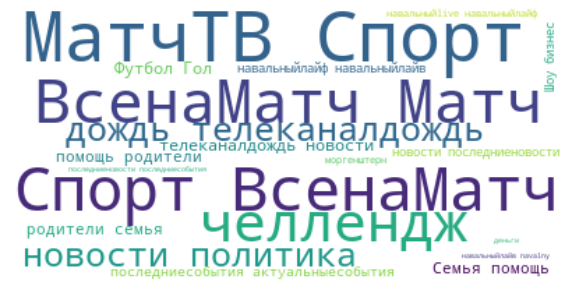

In [228]:
wordcloud = WordCloud(max_words=20,max_font_size=50,background_color="white").generate(str(text))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()